##### [< Forrige](11%20-%20interaktive%20websider.ipynb#Interaktivt-kart)    |     <span style="color:lightgrey">Neste></span>

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 12 - animasjon og klasse </span>  

# Hva er en klasse i python

En "klasse" i bython er et objekt. Python er et objektorientert programmeringsspråk, som de fleste moderne programmerinsspråk er. Hittil har vi imidlertid kjørt programmer som har en begynnelse og en slutt. 

Et objekt er noe som skapes, og er der så lenge programmet kjører. Et objekt kan ha egenskaper (variabler som inneholder tekst, tall, lister eller andre objekter) og funksjoner. 

For å skjønne poenget med objekter er det greit å begynne med et enkelt eksempel. Vi kan for eksempel lage en robot, eller "bot" som det ofte kalles. Vi starter med å definere hva klassen (objekt-typen) skal hete ("Bot") og hva som skal skje når objektet initieres (`__init__()`-funksjonen). 

#### Eksempel 1:

In [1]:
class Bot():
    def __init__(self, name, greeting='Hello', presentation='My name is', feelings=False):
        self.name=name
        self.greeting=greeting
        self.feelings=feelings
        self.presentation=presentation
        
    def answer(self,question):
        if question=='Do you have feelings?':
            return f'It is {self.feelings} that I have feelings'
        if question=='What is your name?':
            return f"{self.presentation} {self.name}"
        if question=='Hi!':
            return self.greeting

Vi har nå definert hva slags struktur boten vår skal ha. Da er det tid for å lage en bestemt utgave av 'boten, som vi kan kalle "Leif":

#### Eksempel 2:

In [2]:
the_bot_leif=Bot('Leif', 'Hello!', 'My name is', True)

Om du har kjørt koden over, kan du nå teste ut 'boten:

#### Eksempel 3:

In [3]:
the_bot_leif.answer('Hi!')

'Hello!'

In [4]:
the_bot_leif.answer('What is your name?')

'My name is Leif'

In [5]:
the_bot_leif.answer('Do you have feelings?')

'It is True that I have feelings'

# Eksempel på animasjon og klasse

Vi kan for eksempel bruke klasse til å laget et marked, med tilbud, etterspørsel og en likevekt. Denne klassen har en bestemt tilbudsfunksjon, etterspørselsfunksjon og du kan sette en skatt på markedet når du oppretter det. 

Som du ser av `__init__`-funksjonen, så regnes likevekspris og kvantum ut når markedet opprettes, med gitt skatt. Skatten legges til tilbudsfunksjonen, slik at når denne kalles, så vil det være inkludert skatt. 

Til å regne ut likevekt, bruker vi sympy slik vi har lært i [5 - sympy](5%20-%20sympy.ipynb).

#### Eksempel 4:

In [6]:
import sympy as sp

class Market():
    def __init__(self, tax=0):
        self.tax = tax
        x = sp.symbols('x')
        eq_cond = sp.Eq(self.demand(x),self.supply(x))
        x_eq = sp.solve(eq_cond,x)
        self.x = float(x_eq[0])
        self.p = self.demand(self.x)
        
    def supply(self, x):
        return (x**2)*(1/250)+10+self.tax

    def demand(self, x):
        return 3000/(100+x)


    

Ved å opprette to markeder, ett med skatt og ett uten, kan vi sammenligne situasjonen. Vi starter med å lage de to markedene, der vi setter en skatt på 10 i det ene markedet:

#### Eksempel 5:

In [7]:
mkt = Market()
mkt_tax = Market(10)

Vi kan nå plotte disse. Vi plotter tilbud og etterspørsel i markedene på samme måte som før i [3 - matplotlib](3%20-%20matplotlib.ipynb), bortsett fra at vi setter det inn i en funksjon. 

Legg merke til at vi først lager et figur- og akseobjekt som vil være uendret, men at innholdet i akseobjektet slettes hver gang vi kaller `save_plot`. Årsaken til dette er at vi lenger ned skal lage mange figurer. Om vi oppretter et nytt figurobjekt hver gang vil alle figurene trenge plass i minnet til PC'en, noe som vil gi unødvendig stor bruk av maskinens internminne. 

#### Eksempel 6:

In [8]:
%%capture
#%%capture avoids printing an empty figure here
import numpy as np
from matplotlib import pyplot as plt

#create figure and axis objects. These objects will be used for every plot, in order to conserve memory. 
fig, ax=plt.subplots(figsize=(15,10), dpi=100)

def save_plot(market, market_taxed, i):
    """Plots market and market_taxed and saves to /img/fig<i>.png """
    #clearing previouis plot. We use the same ax each time, and clear it before plotting, to save memory
    ax.clear()

    #formatting the plot:
    ax.set_ylabel('Pris')
    ax.set_xlabel('Enheter')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlim([0, 100])
    ax.set_ylim([0, 40])


    #setting the quantities to plot
    x = np.linspace(0,100,100)

    #drawing supply
    ax.plot(x,  market.supply(x),       label='Tilbud')

    #drawing supply after tax
    ax.plot(x,  market_taxed.supply(x), label='Tilbud etter skatt', color='black')

    #drawing demand
    ax.plot(x,  market.demand(x),       label='Etterspørsel',       color='green',)

    #adding legend:
    ax.legend(loc='upper center',frameon=False)
    
    #saving the plot:
    fig.savefig(f'./img/fig{i}.png')


    return fig



Vi kan nå plotte markedene, med og uten skatt:

#### Eksempel 7:

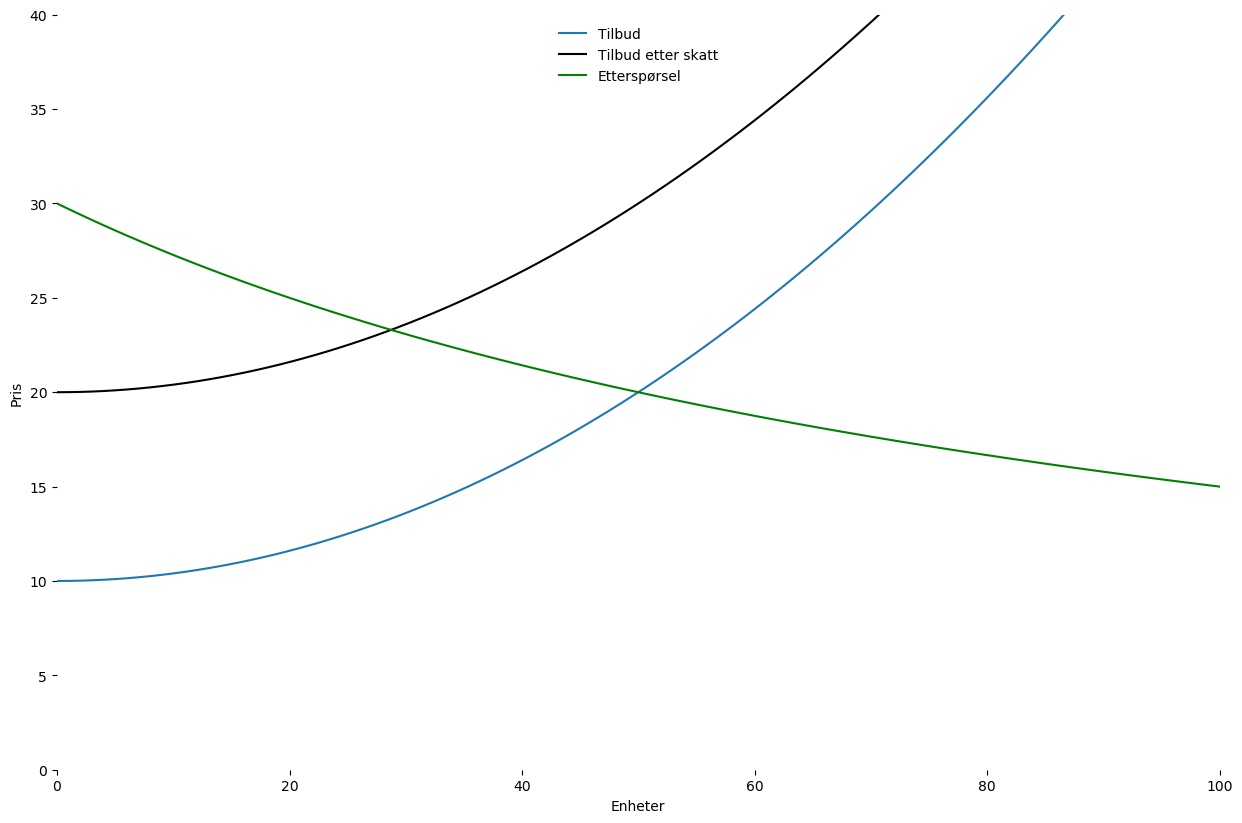

In [9]:
save_plot(mkt, mkt_tax,0)

Om du nå sjekker i mappen 'img' i samme mappe som denne jupyter-filen ligger, vil du finne bildet over. 

# Vi lager en dynamisk nettside

Vi skal nå lage en dynamisk nettside, med et skyvelær hvor vi kan velge skattenivå. Funksjonen `create_html_file` under lager en html-fil i mappen der denne jupyter-filen ligger. Den tar `rng` som argument, som representerer en etikett som skal vises til hvert bilde vi lager.  

Funksjonen `read_file` sørger for at `create_html_file` kan lese to filer "res/html1.txt" og "res/html2.txt" som brukes til å lage html-filen. 

Vi skal ikke gå veldig detaljert inn på hvordan funksjonen under fungerer, men nøye oss med å si at det vil bli en oppgave for denne leksjonen å endre html-kodene i ovennevnte filer. 

#### Eksempel 8:

In [10]:
def read_file(fname):
    f=open(fname,'r')
    r=f.read()
    f.close()
    return r

def create_html_file(rng):
    """This function creates a html-file with a slider that select the image for the desired year. 
    rng is an array with 
    It assumes that images with names /img/fig<i>.png have been saved"""
    
    n=len(rng)
    s=f"<br><br><input type='range' min='0' max='{n-1}' value='34' class='slider' id='myRange'><br><br>\r\n"
    #iterating to create a html-tag for each image:
    for k in range(len(rng)):
        s+=f"<img class='slides' src='./img/fig{k}.png'>\r\n"

    #building the html-code from a string and two files:
    html=s+f"\r\n</body>\r\n<script>\r\n	var array = JSON.parse('{list(rng)}');"	
    html_fileI =  read_file("res/html1.txt")
    html_fileII = read_file("res/html2.txt")

    #creating the target file and writing to it, before closing:
    result_file=open("Tax and consumer surplus.html",'w')
    result_file.write(html_fileI+html+html_fileII)
    result_file.close()
    
create_html_file(taxes)


NameError: name 'taxes' is not defined

Vi kan nå lage nettsiden vår. Det gjør vi ved å lage 15 ulike skattenivåer i intervallet -30 til 18, og så lage ett plott for hvert nivå, med og uten skatt. 

#### Eksempel 9:

In [ ]:
#creating the reference market
mkt=Market()

#defining dimensions for plot
fig, ax=plt.subplots(figsize=(15,10), dpi=100)

#creating a vector of tax-levels
taxes=np.linspace(-30,18,15)

#iteratign over tax levels. 
i=0
for tax in taxes:
    #creating a market with tax
    mkt_taxed=Market(tax)
    
    #saving the plot
    save_plot(mkt,mkt_taxed,i)
    
    i+=1
    
#creating the html-file
create_html_file(taxes)

Om du ser i `img`-mappen, vi du se alle plottene der. Og i samme mappe som denne jupyter-filen vil du finne "Tax and consumer surplus.html". Klikker du på den, får du opp en dynamisk nettside som endrer på plott når du skyver på skyvelæret. 

# En litt mer avansert figur

Vi kan gjøre figuren mer avansert ved å legge til flere elementer fra figuren i [5 - sympy](5%20-%20sympy.ipynb). For markedet kan vi legge til en funksjon som regner ut konsument-, produsent- og velferdsgevinst. Disse legges så til som en egenskap ved markedet (en egenskap med `self`) etter avrunding:

#### Eksempel 10:

In [ ]:
class Market():
    def __init__(self, tax=0):
        self.tax = tax
        x = sp.symbols('x')
        eq_cond = sp.Eq(self.demand(x),self.supply(x))
        x_eq = sp.solve(eq_cond,x)
        self.x = float(x_eq[0])
        self.p = self.demand(self.x)
        self.calc_welfare()
        
    def supply(self, x):
        return (x**2)*(1/250)+10+self.tax

    def demand(self, x):
        return 3000/(100+x)
    
    def calc_welfare(self):
        x=sp.symbols('x')
        consumer_surplus = sp.integrate( self.demand(x) - self.p,                
                                        (x,0,self.x) )
        producer_surplus = sp.integrate( self.p         - self.supply(x), 
                                        (x,0,self.x) )
        welfare_surplus  = sp.integrate( self.demand(x) - mkt.supply(x),  
                                        (x,0,self.x) )
        
        self.consumer_surplus = np.round(float(consumer_surplus),2)
        self.producer_surplus = np.round(float(producer_surplus),2)
        self.welfare_surplus  = np.round(float(welfare_surplus),2)



Som i [5 - sympy](5%20-%20sympy.ipynb) legger vi til fargelegging av velferdsgevinster. Ellers er plottet her indentisk med det tidligere:

#### Eksempel 11:

In [ ]:
def save_plot(market, market_taxed, i):
    #clearing previouis plot
    ax.clear()

    #formatting the plot:
    ax.set_ylabel('Pris')
    ax.set_xlabel('Enheter')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xlim([0, 100])
    ax.set_ylim([0, 40])


    #setting the quantities to plot
    x = np.linspace(0,100,100)

    #drawing supply
    ax.plot(x,  market.supply(x),       label='Tilbud')

    #drawing supply after tax
    ax.plot(x,  market_taxed.supply(x), label='Tilbud etter skatt', color='black')

    #drawing demand
    ax.plot(x,  market.demand(x),       label='Etterspørsel',       color='green',)

    #drawing consumer surpluss
    x = np.linspace(0,  market_taxed.x,  100)
    ax.fill_between(x,  float(market_taxed.p),    
                        market_taxed.demand(x), 
                        color = "pink",
                        alpha = 0.3,
                        label = f'Konsumentoverskudd: {market_taxed.consumer_surplus}')


    #drawing producer surpluss
    ax.fill_between(x,   market_taxed.supply(x),   
                         float(market_taxed.p), 
                         color = "yellow", 
                         alpha = 0.3,
                         label = f'Produsentoverskudd: {market_taxed.producer_surplus}')


    ax.vlines(float(market_taxed.x), 0, 40,
                   colors=['black'],
                   linestyles='dashed', 
                   label='Likevektskvantum')  
    
    #adding legend:
    ax.legend(loc='upper center',frameon=False)

    #saving the plot:
    fig.savefig(f'./img/fig{i}.png')



    return fig

Vi kan nå lage en ny nettside, med ekstrainformasjonen. Koden under er identisk med den vi kjørte sist:

#### Eksempel 12:

In [ ]:
#creating the reference market
mkt=Market()

#defining dimensions for plot
fig, ax=plt.subplots(figsize=(15,10), dpi=100)

#creating a vector of tax-levels
taxes=np.linspace(-30,18,15)

#iteratign over tax levels. 
i=0
for tax in taxes:
    #creating a market with tax
    mkt_taxed=Market(tax)
    
    #saving the plot
    save_plot(mkt,mkt_taxed,i)
    
    i+=1
    
#creating the html-file
create_html_file(taxes)

# Oppgave

1. Nettsiden lages ved å hente teksten som ligger i filen "/res/html1.txt". Du skal åpne denne filen og rediger den slik at

    1. Tittelen på fanen blir riktig
    2. Overskriften blir riktig
    3. Beskrivelsen blir riktig, og fjern teksten som er feil formatert. 
    4. Sørg for at skatten blir avrundet. 
    
    
2. Lag en egen nettside basert på den vi nettopp har valgt, men med en annen figur. Du kan for eksempel la skyvelæret endre på et parameter i det første eksemplet i [5 - sympy](5%20-%20sympy.ipynb). 

##### [< Forrige](11%20-%20interaktive%20websider.ipynb#Interaktivt-kart)    |     <span style="color:lightgrey">Neste></span>